In [46]:
from PIL import Image
from pygifmaker.pygifmaker import GifMaker
from glob import glob

In [6]:
gifmaker = GifMaker()

In [32]:
result_path = "./saved_images/train_2/*"

images_path = glob(result_path)

In [37]:
def sort_key(path):
    return int(path.split("/")[-1].split("_")[-1].split(".")[0])

In [39]:
human = [i.replace("\\", "/") for i in images_path if "human" in i]
animal = [i.replace("\\", "/") for i in images_path if "animal" in i]
test = [i.replace("\\", "/") for i in images_path if "test" in i]
human = sorted(human, key=lambda x: sort_key(x))
animal = sorted(animal, key=lambda x: sort_key(x))
test = sorted(test, key=lambda x: sort_key(x))

In [42]:
GifMaker.Make("./docs/result.gif", test, 3, 0)
GifMaker.Make("./docs/human2animal.gif", human, 3, 0)
GifMaker.Make("./docs/animal2human.gif", animal, 3, 0)

In [43]:
from IPython.display import Image
Image(url='./docs/result.gif')  

In [53]:
human_images = [Image.open(file).convert("RGB") for file in human]
animal_images = [Image.open(file).convert("RGB") for file in animal]
test_images = [Image.open(file).convert("RGB") for file in test]

In [54]:
from PIL import ImageDraw

img = test_images[0]

color = (0,255,0)
text_pos = (10, 10)

draw = ImageDraw.Draw(img)
draw.text(text_pos, 'Epoch: 1',color) 
img.show()

In [56]:
color = (0, 255, 0)
text_post = (10, 10)

def draw_epoch_text(image, idx):
    draw = ImageDraw.Draw(image)
    draw.text(text_pos, f"Epoch: {idx+1}", color)
    return image

human_images = [draw_epoch_text(im, idx) for idx, im in enumerate(human_images)]
animal_images = [draw_epoch_text(im, idx) for idx, im in enumerate(animal_images)]
test_images = [draw_epoch_text(im, idx) for idx, im in enumerate(test_images)]

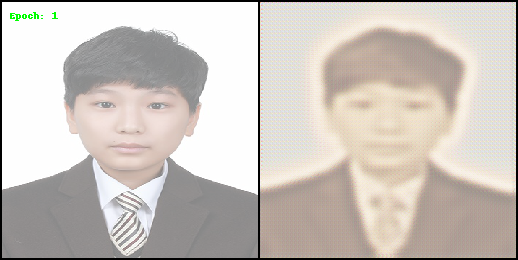

In [59]:
test_images[0]

In [62]:
GifMaker.PIL("./docs/result.gif", test_images, 3, 0)
GifMaker.PIL("./docs/human2animal.gif", human_images, 3, 0)
GifMaker.PIL("./docs/animal2human.gif", animal_images, 3, 0)